# Multiple Linear Regression
## Bike Sharing Assignment
### Steps for Model Creation and Evaluation
    1. Reading and understanding the data
    2. Data Preparation
    3. Splitting the data into train-test split
    4. Building a Linear Model
    5. Residual Analysis of the train data
    6. Making Predictions Using the Final Model
    7. Model Evaluation
         

## Step 1 : Reading and understanding the data

In [3406]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3407]:
import numpy as np
import pandas as pd

In [3408]:
bike_sharing_data = pd.read_csv("/Users/akashb/Downloads/bike_sharing.csv")

In [3409]:
# Check the head of the dataset
bike_sharing_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [3410]:
bike_sharing_data.shape

(730, 16)

In [3411]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3412]:
# Since all the columns has all the values as non-null, there is no need to drop/impute rows and columns based on the same.

In [3413]:
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2 : Data Preparation


In [3415]:
# Dropping the columns which are irrelevant
# casual, registered users as their sum is already captured in cnt and dteday as weekday, month, year are already separate columns present
# in the dataset


In [3416]:
bike_sharing_data.drop(['dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [3417]:
bike_sharing_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [3418]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [3419]:
# Changing the categorical variables back to their original value as current dataset contains numerical values for the same, which suggests
# some order, which is incorrect interpretation


# Creating mappings for various category columns as mentioned in the data dicitionary
# mappings
season_mapping = {1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}
weekday_mapping = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
weathersit_mapping = {1 : 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'}
month_mapping = {1 : 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6 : 'June', 7: 'July', 8: 'Aug', 9: 'Sept', 
                 10 : 'Oct', 11: 'Nov', 12: 'Dec'}

# applying the mappings to respective columns and checking the head again
bike_sharing_data['season'] = bike_sharing_data['season'].map(season_mapping)
bike_sharing_data['weekday'] = bike_sharing_data['weekday'].map(weekday_mapping)
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].map(weathersit_mapping)
bike_sharing_data['mnth'] = bike_sharing_data['mnth'].map(month_mapping)

bike_sharing_data['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [3420]:
# creating dummy variables for all the categorical variable having more that 2 distinct values
season_dummies = pd.get_dummies(bike_sharing_data['season'], drop_first = True).astype(int)
season_dummies

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [3421]:
weekday_dummies = pd.get_dummies(bike_sharing_data['weekday'], drop_first = True).astype(int)
weekday_dummies

,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


In [3422]:
weathersit_dummies = pd.get_dummies(bike_sharing_data['weathersit']).astype(int)
weathersit_dummies

,Clear,Light Snow,Misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


In [3423]:
month_dummies = pd.get_dummies(bike_sharing_data['mnth'], drop_first = True).astype(int)
month_dummies

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [3424]:
# concatinating the dummy columns to the bike_sharing_data dataframe
bike_sharing_data = pd.concat([bike_sharing_data, season_dummies, weekday_dummies, weathersit_dummies, month_dummies], axis = 1)

In [3425]:
# dropping the actual columns for which dummies have been created
bike_sharing_data.drop(['season', 'weekday', 'weathersit', 'mnth'] , axis= 1, inplace = True)
bike_sharing_data.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


## Performing EDA

In [3427]:
import seaborn as sns
import matplotlib.pyplot as plt


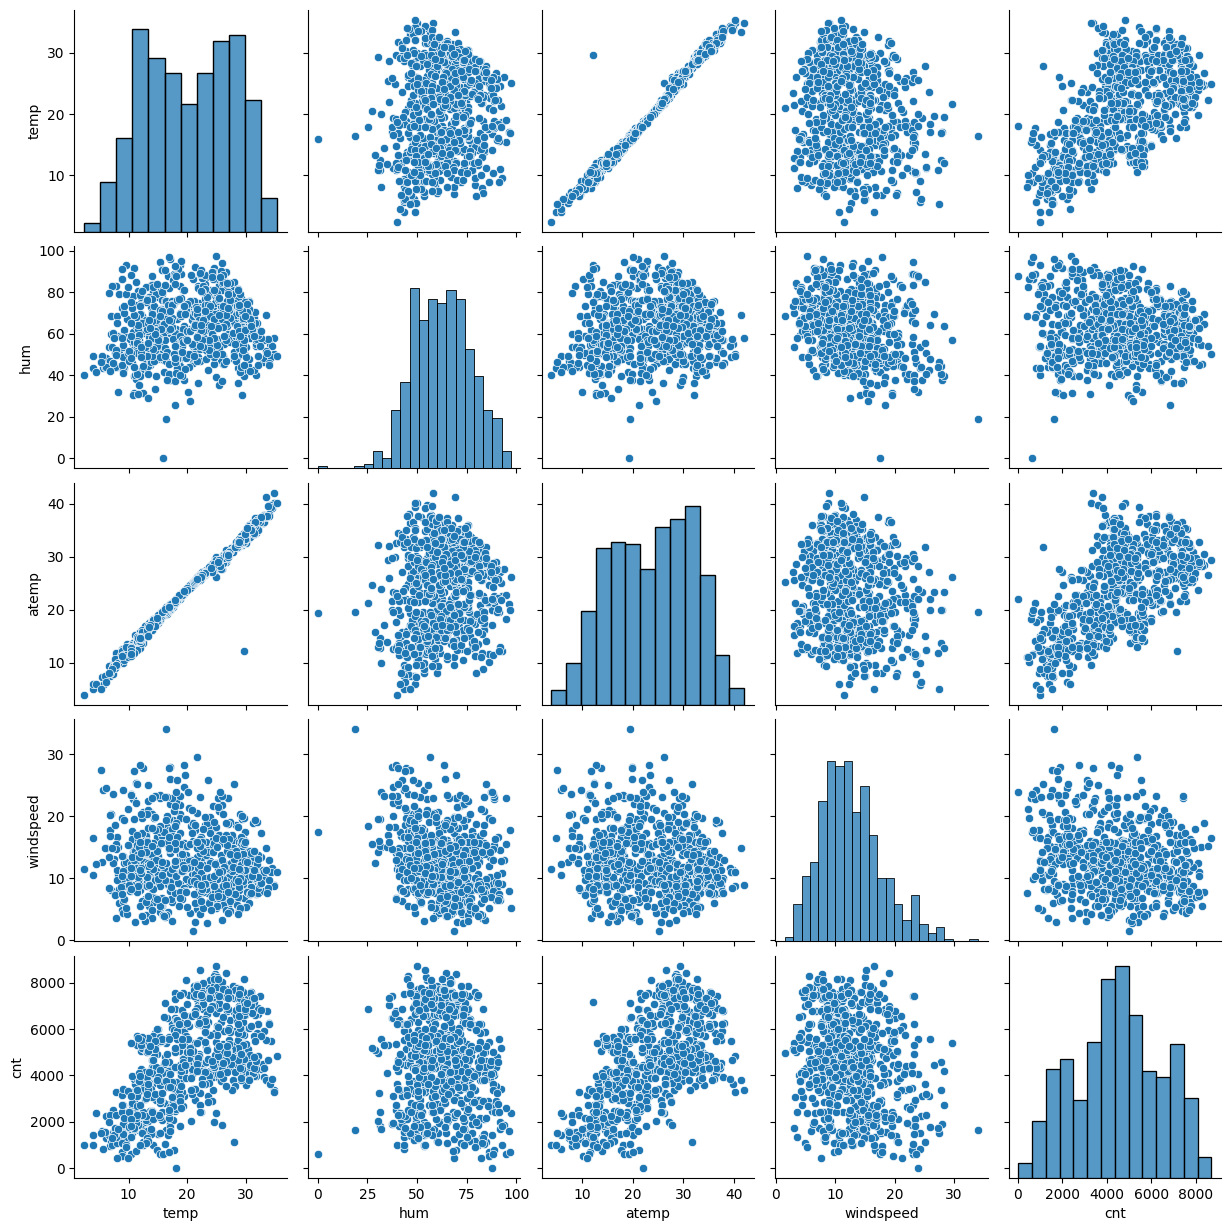

In [3428]:
numerical_variables = ['temp', 'hum', 'atemp', 'windspeed', 'cnt']
sns.pairplot(bike_sharing_data[numerical_variables])
plt.show()

## Step 3 : Splitting the data into train-test split

In [3430]:
from sklearn.model_selection import train_test_split

In [3431]:
bike_sharing_data_train, bike_sharing_data_test = train_test_split(bike_sharing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features using MinMaxScaler on the train data

In [3433]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bike_sharing_data.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Mon', 'Sat', 'Sun',
       'Thurs', 'Tues', 'Wed', 'Clear', 'Light Snow', 'Misty', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept'],
      dtype='object')

In [3434]:
# Apply scaler to all the columns except dummy variables since their value is already either 0 and 1
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_sharing_data_train[num_vars] = scaler.fit_transform(bike_sharing_data_train[num_vars])
bike_sharing_data_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
653,654,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,...,0,0,0,0,0,0,0,0,1,0
576,577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,1,0,0,0,0,0,0,0,0,0
482,483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,0,0,0,0,0


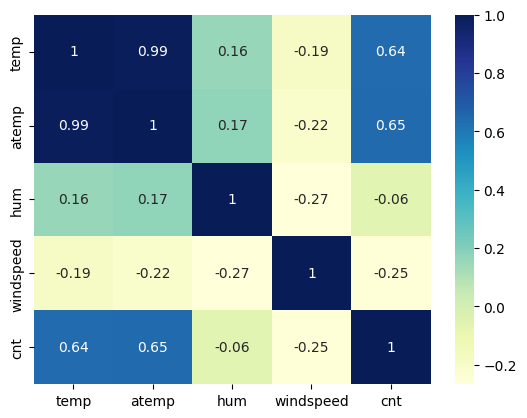

In [3435]:

sns.heatmap(bike_sharing_data_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Dividing into X and Y sets for model building

In [3437]:
y_train = bike_sharing_data_train.pop('cnt')
X_train = bike_sharing_data_train

## Step 4 : Building the model using RFE(Recursive Feature Elimination)

In [3439]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [3440]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 17),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', False, 12),
 ('Thurs', False, 10),
 ('Tues', True, 1),
 ('Wed', False, 11),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Misty', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 14),
 ('Sept', True, 1)]

In [3441]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Mon', 'Tues', 'Clear', 'Light Snow', 'Misty', 'July',
       'Sept'],
      dtype='object')

In [3442]:
X_train_rfe = X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [3443]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.81e-190
Time:                        22:37:35   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1255      0.023      5.527      0.0

In [3444]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
9,Mon,inf
10,Tues,inf
11,Clear,inf
12,Light Snow,inf
13,Misty,inf
4,temp,2.99
7,spring,2.55
5,hum,1.89


In [3445]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.81e-190
Time:                        22:37:35   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0971      0.033      2.971      0.0

In [3446]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Clear,inf
11,Light Snow,inf
12,Misty,inf
2,workingday,9.07
8,Mon,6.06
9,Tues,5.74
3,temp,2.99
6,spring,2.55
4,hum,1.89
7,winter,1.78


In [3447]:
X_train_new = X_train_new.drop(["Light Snow"], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.81e-190
Time:                        22:37:35   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0182      0.052     -0.349      0.7

In [3448]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,171.08
10,Clear,10.21
2,workingday,9.07
11,Misty,8.83
8,Mon,6.06
9,Tues,5.74
3,temp,2.99
6,spring,2.55
4,hum,1.89
7,winter,1.78


In [3449]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Mon', 'Tues', 'Clear', 'Misty', 'July', 'Sept'],
      dtype='object')

In [3450]:
X_train_new = X_train_new.drop(["const"], axis = 1)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1486.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):                        0.00
Time:                        22:37:35   Log-Likelihood:                          511.38
No. Observations:                 510   AIC:                                     -996.8
Df Residuals:                     497   BIC:                                     -941.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [3451]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.80
1,workingday,20.91
2,temp,18.97
9,Clear,15.25
10,Misty,9.19
7,Mon,5.48
8,Tues,5.35
4,windspeed,4.49
5,spring,3.08
6,winter,2.24


In [3452]:
X_train_new = X_train_new.drop(["Tues"], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.88e-190
Time:                        22:37:35   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0337      0.047      0.720      0.4

In [3453]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,136.64
9,Clear,10.20
10,Misty,8.83
3,temp,2.99
6,spring,2.54
4,hum,1.89
7,winter,1.77
2,workingday,1.65
8,Mon,1.64
11,July,1.30


In [3454]:
X_train_new = X_train_new.drop(["Clear"], axis = 1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     197.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.40e-173
Time:                        22:37:35   Log-Likelihood:                 466.59
No. Observations:                 510   AIC:                            -909.2
Df Residuals:                     498   BIC:                            -858.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3608      0.034     10.537      0.0

In [3455]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.16
3,temp,2.95
6,spring,2.54
7,winter,1.77
2,workingday,1.64
8,Mon,1.63
4,hum,1.60
9,Misty,1.40
10,July,1.29
5,windspeed,1.13


In [3456]:
# Above model is the final with all the variabeles having VIF < 5 and p-values < 0.05

## Step 5 : Residual Analysis of the train data

In [3458]:
y_train_cnt = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

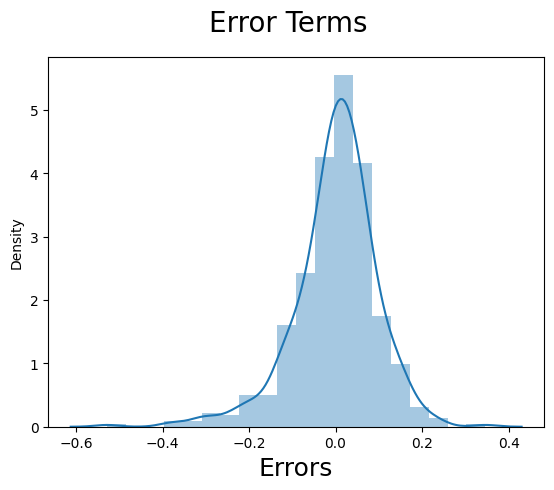

In [3459]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 6 : Making Predictions Using the Final Model

In [3461]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_sharing_data_test[num_vars] = scaler.transform(bike_sharing_data_test[num_vars])

In [3462]:
y_test = bike_sharing_data_test.pop('cnt')
X_test = bike_sharing_data_test

In [3463]:
X_test = sm.add_constant(X_test)
X_test_new = X_test[X_train_new.columns]

In [3464]:
y_pred = lm.predict(X_test_new)

## Step 7 : Model Evaluation

In [3466]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8156660373190996

Text(0, 0.5, 'y_pred')

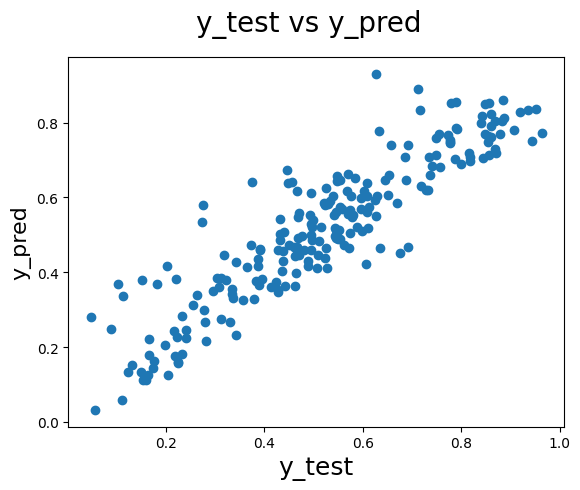

In [3467]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      